http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
http://nbviewer.jupyter.org/gist/greglandrum/4316433
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
https://github.com/transcranial/jupyter-themer?lipi=urn%3Ali%3Apage%3Ad_flagship3_pulse_read%3Bcf%2FyvqIkSsGQ%2BQ9yqhtvyw%3D%3D
https://pandas.pydata.org/pandas-docs/stable/style.html

# Mice Protein Expression Data Set
### UCI Machine Learning Repository - Center for Machine Learning and Intelligent Systems

## Abstract

<div style="text-align: justify; LINE-HEIGHT:20px"> The data file ‘Data_Cortex_Nuclear.xls’ was imported into the interactive shell iPython as filename 'AllProtein'. The libraries pandas, matplotlib and numpy were imported as pd, plt and np respectively. Data was then checked for type, sample rows column names and size (found 1080 by 82). Data cleaning was initially performed by selecting for 11 target protein expression attributes, which had previously been found to have high correlations with learning outcomes. The Boolean categorical labels Treatment, Genotype and Behavior were then replaced with binary Boolean values 0 or 1, and the attribute label Class was generated with the resultant binary Boolean labels to produce 8 unique integer Class labels. A scatter matrix of the uncleaned data was checked to provide direction for analysis, followed by removal of outliers and NaN values. Outliers were identified as falling out a 99th percentile range from any raw protein expression data column. During outlier analysis mouse 3484 was identified as having over 60 outlier values, and was removed from the data set. The outliers and NaN values were then filled with a Class mean.
<br><br> 
Following cleaning the data was visualised through a variety of plots to help gain understanding and insight. The data was then modelled with a K-Nearest Neighbour Classification and a Decision Tree Model. The K-Nearest Model worked best with 5 neighbours, distance weighting and Manhattan distance (p = 1). The Decision Tree Models had an average accuracy ranging between 0.79 to 0.98, indicating extremely good predictive capability.</div>

## Introduction

<div style="text-align: justify; LINE-HEIGHT:20px">
Down Syndrome (DS) has a prevalence globally of 1 in a 1000 live human births, and is the most common genetically defined cause of intellectual disabilities (Costa 2008, Higuera 2015). DS in humans is caused by the presence of an additional chromosome 21, referred to as trisomy (Costa 2008). Protein expression is significantly perturbed by human trisomy 21, leading to the physical and intellectual manifestations associated with DS. Due to its prevalence and health implications, a strong imperative exists to further understand and treat the condition. Davisson et al., successfully manipulated a mouse genome to produce several models of DS in rodents (Davission, 1933). The Ts65Dn mouse is the best-characterized of the DS models (Mitra, 2012). Higuera et al employed Ts65Dn and normal mice in experimental and control groups, exposing them to a range of variables (figure 1). The rodents were then euthanized and their cortex protein levels were analysed in a quantitative fashion. The resultant data was subject to an unsupervised clustering method known as Self Organising Maps (SOM) followed by labelling, in order to establish causal relationships between learning outcome, substance exposure, genetic structure and protein expression. The dataset generated by Higuera et al (_Mice Protein Expression Data Set_, described in table 1) is now freely available from the online, open-source repository _UCI Machine Learning Repository_ (http://archive.ics.uci.edu/ml/), and will be the focus of this analysis.
</div>

#### table 1 - mice protein expression data set

| Data Set Characteristic | Number of Instances | Area |Attribute Characteristics  | Number of Attributes | Date Donated |
|------------ |-------------- |-------------  | ---- | ----- | ----- |  
|Multivariate |     1080   | Life Sciences      |Real   | 82 | 2015-08-04

<br>
<center>
<img src="http://journals.plos.org/plosone/article/figure/image?size=medium&id=10.1371/journal.pone.0129126.g001" width="500" height="500" />
</center>  
<br>
_Fig 1. Classes of mice. (A) There are eight classes of mice based on genotype (control, c, and trisomy, t), stimulation to learn (Context-Shock, CS, and Shock-Context, SC) and treatment (saline, s, and memantine, m). Learning outcome indicates the response to learning for each class. (B) Number of mice in each class. (C) Format of protein expression data: rows are individual mice, and columns, P 1 … P77, are the measured levels of the 77 proteins._

## Aim

<div style="text-align: justify; LINE-HEIGHT:20px">
During this task the data generated by Higuera et al; _Mice Protein Expression Data Set_ will be imported into an interactive shell, explored, and preprocessed, followed by data modelling, presentation and automation. As the data set is explored and analysed, observations will be recorded and used in the final steps of constructing classification models, k-means and a decision tree. These models will enable future analysis of similar datasets to be performed in a faster and more efficient manner.
</div>

## Data Imporation and Exploration

<div style="text-align: justify; LINE-HEIGHT:20px">The data analysis toolkit pandas (McKinney 2010), the scientific computing package numpy, the 2D plotting library matplotlib (Hunter 2007) and the library for opening URLs urllib2 (core python module) were imported into IPython (Perez & Granger 2007) as pd, np, plt and urllib2 respectively. The Excel file ‘Data_Cortex_Nuclear.xls’ was imported from UCI’s machine learning repository (http://archive.ics.uci.edu/ml/) IPython and named “proteinExpression”.</div>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.style.use('seaborn-white') # Updating plot style
import urllib2 # Used for importation of dataset
from sklearn.cross_validation import train_test_split # Validation during model creation
from sklearn.neighbors import KNeighborsClassifier # Machine Learning tool
from sklearn.metrics import confusion_matrix # Machine Learning tool
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import os

/Users/alistairgj/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Importing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"
proteinExpression = pd.read_excel(urllib2.urlopen(url), headers=0)

<div style="text-align: justify; LINE-HEIGHT:20px"> The following code was used to initially check the dataset.</div>

In [3]:
# Checking the column (attribute) names
columnIDlist = proteinExpression.columns.tolist()
print columnIDlist

[u'MouseID', u'DYRK1A_N', u'ITSN1_N', u'BDNF_N', u'NR1_N', u'NR2A_N', u'pAKT_N', u'pBRAF_N', u'pCAMKII_N', u'pCREB_N', u'pELK_N', u'pERK_N', u'pJNK_N', u'PKCA_N', u'pMEK_N', u'pNR1_N', u'pNR2A_N', u'pNR2B_N', u'pPKCAB_N', u'pRSK_N', u'AKT_N', u'BRAF_N', u'CAMKII_N', u'CREB_N', u'ELK_N', u'ERK_N', u'GSK3B_N', u'JNK_N', u'MEK_N', u'TRKA_N', u'RSK_N', u'APP_N', u'Bcatenin_N', u'SOD1_N', u'MTOR_N', u'P38_N', u'pMTOR_N', u'DSCR1_N', u'AMPKA_N', u'NR2B_N', u'pNUMB_N', u'RAPTOR_N', u'TIAM1_N', u'pP70S6_N', u'NUMB_N', u'P70S6_N', u'pGSK3B_N', u'pPKCG_N', u'CDK5_N', u'S6_N', u'ADARB1_N', u'AcetylH3K9_N', u'RRP1_N', u'BAX_N', u'ARC_N', u'ERBB4_N', u'nNOS_N', u'Tau_N', u'GFAP_N', u'GluR3_N', u'GluR4_N', u'IL1B_N', u'P3525_N', u'pCASP9_N', u'PSD95_N', u'SNCA_N', u'Ubiquitin_N', u'pGSK3B_Tyr216_N', u'SHH_N', u'BAD_N', u'BCL2_N', u'pS6_N', u'pCFOS_N', u'SYP_N', u'H3AcK18_N', u'EGR1_N', u'H3MeK4_N', u'CaNA_N', u'Genotype', u'Treatment', u'Behavior', u'class']


In [4]:
# Confirming the data types (exploration) - series created and counted
nativeDataTypes = proteinExpression.dtypes
countDataTypes = nativeDataTypes.value_counts()
print countDataTypes

float64    77
object      5
dtype: int64


In [5]:
# Checking the value counts of categorical columns
proteinExpression[['Genotype', 'Treatment', 'Behavior', 
                   'class']].apply(pd.Series.value_counts)

,Genotype,Treatment,Behavior,class
C/S,NaN,NaN,525.0,NaN
Control,570.0,NaN,NaN,NaN
Memantine,NaN,570.0,NaN,NaN
S/C,NaN,NaN,555.0,NaN
Saline,NaN,510.0,NaN,NaN
Ts65Dn,510.0,NaN,NaN,NaN
c-CS-m,NaN,NaN,NaN,150.0
c-CS-s,NaN,NaN,NaN,135.0
c-SC-m,NaN,NaN,NaN,150.0
c-SC-s,NaN,NaN,NaN,135.0


In [6]:
# Attribute 'class' was renamed with 'Class'
proteinExpression.rename(columns = {'class': 'Class'}, inplace = True)

<div style="text-align: justify; LINE-HEIGHT:20px">The importation and initial exploration demonstrates we have successfully imported our data, of which there is a vast quantity, 1080 rows by 82 columns, and the data is both numerical and categorical. The next step will be selecting a subset of target proteins (based on observations by Higuera et al) for our analysis. NaN values for protein expression will be checked once the subset is chosen, to avoid unnecessary computation.</div>

#### table 2 - summary of native data

| Column     | Dtype (native) | Boolean      | Comment       |
|------------|--------------  |--------------|---------------|
|MouseID     |   Object       |  No    |Format of TAG_n, where n = Number of measurements |
|Proteins (all) | Float64|  No |Protein expression levels for 77 proteins (77 attributes) |
|Genotype     |   Object       |  Yes   | Counts: Control 570, Ts65Dn 510   |
|Treatment    |   Object       |  Yes   | Counts: Memantine 570, Saline 510 |
|Behavior     |   Object       |  Yes   | Counts: S/C 555, C/S 525          |
|Class        |   Object       |  No    | Amalgamation of Genotype, Treatment and Behavior |

## Data Preprocessing - Selecting 11 Target Proteins

<div style="text-align: justify; LINE-HEIGHT:20px">Higuera et al observed that of the 77 proteins analysed through self-organizing feature maps, 11 had the greatest correlation with learning outcomes. These were (in no particular order); BRAF_N, pERK_N, S6_N, pGSK3B_N, CaNA_N, CDK5_N, pNUMB_N, DYRK1A_N, ITSN1_N, SOD1_N and GFAP_N. These proteins, along with the tags Genotype, Treatment, Behavior and Class were selected in a new variable, as described below, followed by a brief check of the targetProteins dataset.</div>

In [7]:
# Creating a new data set with desired target proteins and categorical attributes
targetProteins = proteinExpression[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 
                        'GFAP_N', 'Genotype', 'Treatment', 'Behavior', 'Class']]

<div style="text-align: justify; LINE-HEIGHT:20px">As previously mentioned, NaN values for protein expression were to be checked after a subset (targetProteins) was selected, we can see the count for BRAF_N, pERK_N, pNUMB_N, DYRK1A_N, ITSN1_N and SOD1_N to be 1077, rather than 1080.</div>

In [8]:
# Summary statistics check on target proteins
targetProteinsStats = targetProteins.describe()
print targetProteinsStats

            BRAF_N       pERK_N         S6_N     pGSK3B_N       CaNA_N  \
count  1077.000000  1077.000000  1080.000000  1080.000000  1080.000000   
mean      0.378519     0.545904     0.429226     0.161211     1.337784   
std       0.216388     0.345309     0.137440     0.019308     0.317126   
min       0.143894     0.149155     0.130206     0.099976     0.586479   
25%       0.264334     0.337405     0.316684     0.149253     1.081423   
50%       0.326658     0.443644     0.400999     0.160212     1.317441   
75%       0.413561     0.663297     0.534881     0.171739     1.585824   
max       2.133416     3.566685     0.822611     0.253210     2.129791   

            CDK5_N      pNUMB_N     DYRK1A_N      ITSN1_N       SOD1_N  \
count  1080.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.292434     0.357095     0.425810     0.617102     0.542635   
std       0.037380     0.063025     0.249362     0.251640     0.280568   
min       0.181157     0.185598     0

In [9]:
# Checking for missing values
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1077    1077  1080.0    1080.0  1080.0  1080.0     1077      1077   
True        3       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1077    1077  1080.0  
True         3       3     NaN  


### Data Cleaning - Removal of Categorical Data

<div style="text-align: justify; LINE-HEIGHT:20px">The native data contains both numerical (the protein expression levels) and categorical data (Genotype, Behavior, Treatment and Class). Class has 8 different values in the data set, while Genotype, Behavior and Treatment are all Boolean. For successful model creation, this categorical data must be replaced with numerical data. Table 3 – summarizes the proposed strategy for replacing the categorical data. Control, C/S and Saline will be replaced with the integer value 1, while Ts65Dn, S/C and Memantine will be replaced with the integer value 0. In the literature (Higuera  2015) Class is an amalgamation of these three Boolean values top generate one of eight unique tags. We will also amalgamate the three binary integers to generate one of eight unique numerical tags.</div>

#### table 3 - summary of categorical data removal

| Native     | Genotype (G) | Behavior (B) | Treatment (T) | Class |
|------------|--------------|--------------|---------------|-------|
|Categorical |   c , t      |  C/S , S/C   | s , m         |  G-B-T|
|Numerical   |   1 , 0      |  1 , 0       | 1 , 0         |  GBT  |
|            |c(1) = Control| C/S(1) = Context-Shock | m(1) = Memantine|e.g., c-CS-s, 110|
|            |t (0) = Ts65Dn| S/C(0) = Shock-Context | s(0) = Saline   |e.g., t-SC-m, 001|

In [10]:
# Housekeeping - prevents chained assignment warning during following step
pd.options.mode.chained_assignment = None

In [11]:
# Removing string categories
targetProteins['Genotype'].replace('Control', '1', inplace=True)
targetProteins['Genotype'].replace('Ts65Dn', '0', inplace=True)
targetProteins['Genotype'] = targetProteins['Genotype'].astype(int)
targetProteins['Behavior'].replace('C/S', '1', inplace=True)
targetProteins['Behavior'].replace('S/C', '0', inplace=True)
targetProteins['Behavior'] = targetProteins['Behavior'].astype(int)
targetProteins['Treatment'].replace('Saline', '1', inplace=True)
targetProteins['Treatment'].replace('Memantine', '0', inplace=True)
targetProteins['Treatment'] = targetProteins['Treatment'].astype(int)

In [12]:
# Confirming alteration
targetProteins[['Behavior', 'Genotype', 'Treatment']].apply(pd.Series.value_counts)

,Behavior,Genotype,Treatment
0,555,510,570
1,525,570,510


<div style="text-align: justify; LINE-HEIGHT:20px">The following formula was used to convert the binary values of Genotype,  Treatment and Behavior into a unique integer, the formaula was chosen due to it’s ability to convert 3 item binary codes into decimal integers with no redundancy (as per table 4)</div>

$$Class = Genotype * 4 + Behavior * 2 + Treatment$$

In [13]:
# Converting binary to unique identifying numbers
def change_class(row):
    row['Class'] = row['Genotype'] * 4 + row['Behavior'] * 2 + row['Treatment']
    return row

#### table 4 - conversion of categorical class values into numerical values 

| Class Native | Class Binary (G,B,T) | Numerical (as per above formula) |
|--------------|----------------------|----------------------------------|
|c-CS-m        |1,1,0                 |6                                 |
|c-SC-m        |1,0,0                 |4                                 |
|c-CS-s        |1,1,1                 |7                                 |
|t-CS-m        |0,1,0                 |2                                 |
|t-SC-s        |0,0,1                 |1                                 |
|t-SC-m        |0,0,0                 |0                                 |
|c-SC-s        |1,0,1                 |5                                 |
|t-CS-s        |0,1,1                 |3                                 |

In [14]:
# Applying above change to target proteins data
targetProteins = targetProteins.apply(change_class, axis=1)

In [15]:
# Checking value counts
targetProteins['Class'].value_counts()

6    150
4    150
7    135
5    135
2    135
1    135
0    135
3    105
Name: Class, dtype: int64

## Initial Visualization

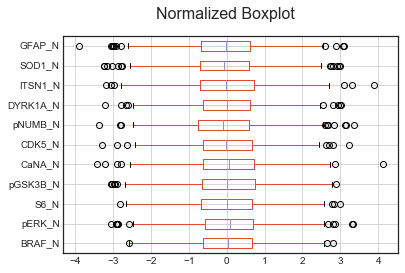

In [16]:
# Will give back a normalized (mean = 0) box plot with outliers
targetProteinsBoxPlot = pd.DataFrame(np.random.randn(1080, 11), columns=['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N'])
targetProteinsBoxPlot.boxplot(figsize=(4,4), vert=False)
plt.suptitle('Normalized Boxplot', fontsize=16)

<div style="text-align: justify; LINE-HEIGHT:20px">The normalized boxplot, above, shows the presence of numerous outliers.</div>

#### Preprocessed Protein Expression Scatter Matrix

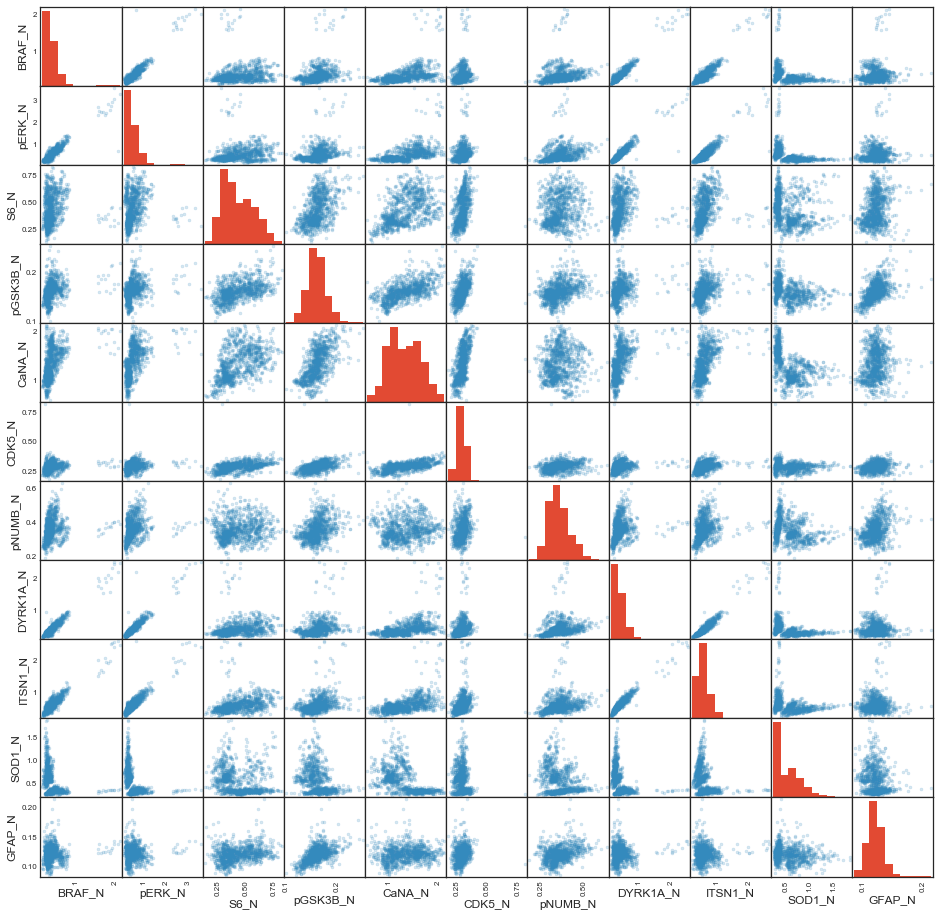

In [17]:
from pandas.tools.plotting import scatter_matrix
scatterProteins = targetProteins[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 
                                  'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                                  'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

## Data Cleaning - Identifying Outliers in the Native Data

<div style="text-align: justify; LINE-HEIGHT:20px">The numerical tag for each protein measurement per mouse was stripped.</div>

In [18]:
miceIDs = proteinExpression['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()
MakeMouseID = proteinExpression['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()

In [19]:
# Protein names list created
proteinNames = ['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']

<div style="text-align: justify; LINE-HEIGHT:20px">The following code removes outliers and NaN from the dataset. This task was given significant consideration, as it will affect all subsequent analysis and conclusions about the data. The code takes the native date and for each protein column determines a count, mean, standard deviation (SD) and then then calculates values +- 2 units of SD on either of the mean (a 95% confidence interval) and +- 3 units of SD on either side of the mean (a 99% confidence interval). A query is then submitted to determine all values falling outside the 99% confidence interval. Note that this calculation was done on the native data, including all values, as the exclusion of what may be outliers would only serve to narrow the range of the 99% confidence, and possibly lead to stripping out of to many data point in further steps.</div>

In [20]:
# Function to quantify the 99th percentile (SD = Standard Deviation)
proteinRows = []
for proteinName in proteinNames:
    count = targetProteins[proteinName].count()
    mean = targetProteins[proteinName].mean()
    sd = targetProteins[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    minusTwoSD = mean - (2 * sd)
    twoSD = mean + (2 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetProteins.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    row = {'Protein': proteinName,'Count': count,'Mean': mean,'SD': sd,
           '-3SD': minusThreeSD,'-2SD': minusTwoSD,'+2SD': twoSD,
           '+3SD': threeSD,'Outliers': outliers[proteinName].count()}
    proteinRows.append(row)

nnPctRangeDF = pd.DataFrame(proteinRows, index=proteinNames, 
                            columns=['Count', 'Mean', 'SD', '-3SD', 
                                     '-2SD', '+2SD', '+3SD', 'Outliers'])
#nnPctRangeDF shows us the number of outliers count for each protein

#### Table 5 – Data Check Column Summary for Native Data

In [21]:
# Add description
print nnPctRangeDF

          Count      Mean        SD      -3SD      -2SD      +2SD      +3SD  \
BRAF_N     1077  0.378519  0.216388 -0.270645 -0.054257  0.811294  1.027682   
pERK_N     1077  0.545904  0.345309 -0.490023 -0.144714  1.236522  1.581831   
S6_N       1080  0.429226  0.137440  0.016905  0.154345  0.704106  0.841546   
pGSK3B_N   1080  0.161211  0.019308  0.103287  0.122595  0.199827  0.219135   
CaNA_N     1080  1.337784  0.317126  0.386405  0.703531  1.972036  2.289162   
CDK5_N     1080  0.292434  0.037380  0.180294  0.217674  0.367194  0.404574   
pNUMB_N    1077  0.357095  0.063025  0.168019  0.231044  0.483145  0.546171   
DYRK1A_N   1077  0.425810  0.249362 -0.322276 -0.072914  0.924534  1.173896   
ITSN1_N    1077  0.617102  0.251640 -0.137818  0.113822  1.120382  1.372022   
SOD1_N     1077  0.542635  0.280568 -0.299070 -0.018501  1.103771  1.384339   
GFAP_N     1080  0.120889  0.013233  0.081189  0.094423  0.147356  0.160589   

          Outliers  
BRAF_N          15  
pERK_N   

In [22]:
# DESCRIPTION + 'Where SD = Standard Deviation'
outlierMiceRows = []
for proteinName in proteinNames:

    mean = targetProteins[proteinName].mean()
    sd = targetProteins[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetProteins.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    if outliers.empty:
        row = {'Protein': proteinName,'MouseID': '-','# Instances': '-','Genotype': '-',
           'Treatment': '-','Behavior': '-','Class': '-'}
        outlierMiceRows.append(row)
    else:
        for mouseID in miceIDs:
            mouseOutlierRows = outliers[outliers['MouseID'].str.contains(mouseID)]
            if not mouseOutlierRows.empty:
                    row = {'Protein': proteinName,'MouseID': mouseID,
                           '# Instances': len(mouseOutlierRows),
                           'Genotype': mouseOutlierRows['Genotype'].iloc[0],
                           'Treatment': mouseOutlierRows['Treatment'].iloc[0],
                           'Behavior': mouseOutlierRows['Behavior'].iloc[0],
                           'Class': mouseOutlierRows['Class'].iloc[0]}
                    outlierMiceRows.append(row)

outliersDF = pd.DataFrame(outlierMiceRows, 
                          columns=['Protein', 'MouseID','# Instances', 
                                   'Genotype','Treatment', 'Behavior', 'Class'])

#### Table 6 – Outlier Summary (from 3SD on either side of the mean)

In [23]:
# Add description
print outliersDF

     Protein MouseID # Instances Genotype Treatment Behavior Class
0     BRAF_N    3484          15        1         1        1     7
1     pERK_N    3484          14        1         1        1     7
2       S6_N       -           -        -         -        -     -
3   pGSK3B_N    3415           1        1         0        1     6
4   pGSK3B_N  50810A           4        1         1        1     7
5   pGSK3B_N  50810D           2        1         1        1     7
6   pGSK3B_N  50810F           3        1         1        1     7
7   pGSK3B_N   18899           1        0         1        1     3
8     CaNA_N       -           -        -         -        -     -
9     CDK5_N    3480           1        1         1        1     7
10    CDK5_N  50810A           2        1         1        1     7
11   pNUMB_N     311           1        1         0        1     6
12   pNUMB_N    3497           5        1         1        1     7
13  DYRK1A_N    3484          15        1         1        1  

<div style="text-align: justify; LINE-HEIGHT:20px">The output from this code allowed identification of MouseID 3484_n, which had 15 outliers instances for BRAF_N, DYRK1A_N, ITSN1_N and 14 outlier instances for pERK_N. Owing to the huge number of outliers in this mouse, it will be removed from the data set. Prior to removal of 3484_n, the other outliers were dealt with. A mean for each class for each protein was determined (this mean excluded outliers), which was then applied to all outlier values. Class for the average rather than taking the average of each individual mouse for any one protein, as the Class contains more instances, and each mouse in each class is exposed to the same set of variables.</div>

### Data Preprocessing – Filling all Outliers as NaN

In [24]:
# Stripping all outliers back to NaN
def make_nans(row):
    for proteinName in proteinNames:
        mean = targetProteins[proteinName].mean()
        sd = targetProteins[proteinName].std()
        minusThreeSD = mean - (3 * sd)
        threeSD = mean + (3 * sd)
    
        if row[proteinName] < minusThreeSD or row[proteinName] > threeSD:
            row[proteinName] = None
        return row
targetProteins = targetProteins.apply(make_nans, axis=1)

In [25]:
# Checking for missing values - native outliers stripped to NaN
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1062    1077  1080.0    1080.0  1080.0  1080.0     1077      1077   
True       18       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1077    1077  1080.0  
True         3       3     NaN  


Discuss finding above...

### Data Preprocessing – Removal of Mouse 3484_n for all Protein Expression Values

<div style="text-align: justify; LINE-HEIGHT:20px">As previously mentioned, mouse 3484_n will be removed and the NaN values were filled with Class average values, as with the originally identified outliers.</div>

In [26]:
# Removal of mouse 3484_n
targetProteins = targetProteins[~targetProteins['MouseID'].str.contains('3484')]
indexOfMouse = np.where(miceIDs=='3484')[0]
miceIDs = np.delete(miceIDs, indexOfMouse)

### Data Preprocessing - Native Data Outliers are Filled with Class Mean

<div style="text-align: justify; LINE-HEIGHT:20px">Outliers were excluded and the mean was re-calculated, then NaN values were filled based on native Class.</div>

In [27]:
# Convert all remaining NaNs to the average value of that protein for that class
def make_averages(row):
    for proteinName in proteinNames:
        if np.isnan(row[proteinName]):
            average = targetProteins[targetProteins.Class == row['Class']][proteinName].mean()
            row[proteinName] = average
    return row
targetProteins = targetProteins.apply(make_averages, axis=1)

In [28]:
# Checking for missing values
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N  S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1065    1065  1065      1065    1065    1065     1065      1065   

       ITSN1_N  SOD1_N  GFAP_N  
False     1065    1065    1065  


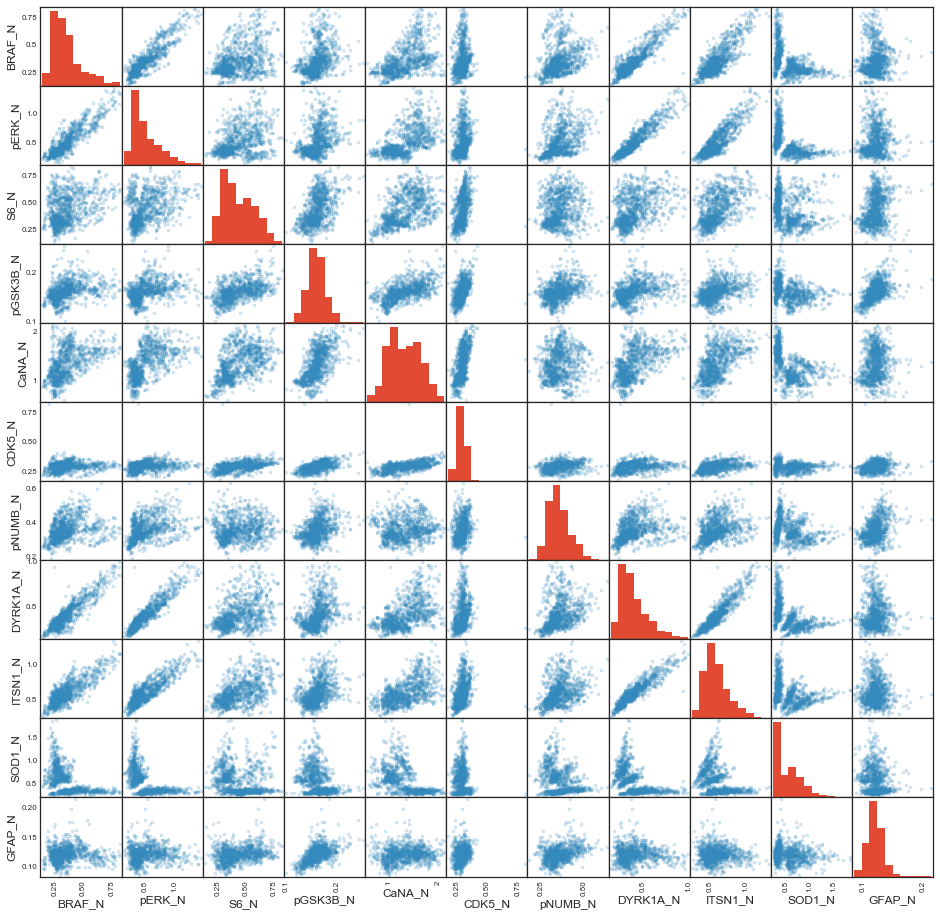

In [29]:
# ADD TITLE
scatterProteins = targetProteins[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                                  'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 
                                  'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()
# Apply changes as above

In [30]:
# Write this dataframe to a CSV file for later use
targetProteins.to_csv("finalData.csv")

## Data Modelling

### Classification 1: K Nearest Neighbours Classification

<div style="text-align: justify; LINE-HEIGHT:20px">One classification analysis was undertaken using sklearn’s (Pedregosa et al 2011) K Neighbors Classifier. Several different classification tasks were undertaken to explore the data and the impact that different input variables has on  the classification result. A summary of the analyses undertaken is shown in Table 1.</div>

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

<div style="text-align: justify; LINE-HEIGHT:20px"> The first analysis run used the default settings for weights (uniform), metrics (Minkowski)  and p (2). Behavior was picked by classified using inputs for SOD1, genotype and treatment. Initially we varied the number of neighbours to see the impact this would have on the error rate. This was repeated using the protein ISTN1 to investigate how different input variables impacted by classification. ISTN1 was then used to test the varying of other input parametres. Weighting the importance of the nearest 5 or 8 neighbours as well as using Manhattan (p=1) distance rather than Euclidean (p=2) were investigated.</div>

<div style="text-align: justify; LINE-HEIGHT:20px">Classification was also undertaken to predict the class (combination of genotype, treatment and behavior) of the mouse based on the expression of all 11 proteins. The same approach was followed as previously described varying the number of neighbours, weighting of neighbours and distance metric.</div>

<div style="text-align: justify; LINE-HEIGHT:20px">The analysis was undertaken by subsetting of Protein11 data (see inputs in Table 9) were split into training/ testing datasets using sklearn.cross_validation.train_test_split. 60% of the data was used to train the model while the remaining 40% was used to test its predictive power. This breakdown was chosen to ensure the model was fitted with ample data to perform well when predictions were made. The model was trained using sklearn.neighbors.KNeighborsClassifier. Confusion matrixes were used to assess the error rate of the classification analysis. They were constructed manually using sklearn.metrics.confusion_matrix and tabulated using Microsoft Excel.</div>

In [32]:
Protein_class = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N', 
                             'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N',
                             'GFAP_N']]
X_train, X_test, y_train, y_test = train_test_split(Protein_class, 
                                                    targetProteins['Class'], 
                                                    test_size=0.4)
print X_train.shape
print y_train.shape

(639, 11)
(639,)


In [33]:
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "5 neighbours predicted: "
print cm

5 neighbours predicted: 
[[45  0  0  0  1  0  0  0]
 [ 3 46  0  0  0  0  0  0]
 [ 0  0 50  2  0  0  3  3]
 [ 0  0  5 36  0  0  2  0]
 [ 1  0  0  0 56  1  0  0]
 [ 0  1  0  0  4 65  0  0]
 [ 0  1  7  4  1  0 31  8]
 [ 0  0  4  5  0  0  5 36]]


In [34]:
clf = KNeighborsClassifier(2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "2 neighbours predicted: "
print cm

2 neighbours predicted: 
[[46  0  0  0  0  0  0  0]
 [ 5 44  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  3  0]
 [ 0  0  6 36  0  0  1  0]
 [ 4  1  0  0 52  1  0  0]
 [ 1  2  0  0  1 66  0  0]
 [ 0  0  7  1  0  0 42  2]
 [ 0  0  4  4  0  0  8 34]]


In [35]:
clf = KNeighborsClassifier(8)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "8 neighbours predicted: "
print cm

8 neighbours predicted: 
[[45  0  0  0  1  0  0  0]
 [ 5 43  0  0  1  0  0  0]
 [ 0  0 48  3  0  0  5  2]
 [ 0  0  8 34  0  0  1  0]
 [ 3  0  0  0 55  0  0  0]
 [ 4  2  0  0  5 59  0  0]
 [ 0  0  8  3  1  1 33  6]
 [ 0  0  5  7  0  0  6 32]]


In [36]:
clf = KNeighborsClassifier(5, weights='distance')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "5 neighbours, distance weighted predicted: "
print cm

5 neighbours, distance weighted predicted: 
[[45  0  0  0  1  0  0  0]
 [ 3 45  0  0  1  0  0  0]
 [ 0  0 53  1  0  0  2  2]
 [ 0  0  2 38  0  0  2  1]
 [ 1  0  0  0 56  1  0  0]
 [ 0  0  0  0  1 69  0  0]
 [ 0  0  2  2  0  0 42  6]
 [ 0  0  2  4  0  0  6 38]]


In [37]:
clf = KNeighborsClassifier(8, weights='distance')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "8 neighbours, distance weighted predicted: "
print cm

8 neighbours, distance weighted predicted: 
[[45  0  0  0  1  0  0  0]
 [ 3 45  0  0  1  0  0  0]
 [ 0  0 49  2  0  0  3  4]
 [ 0  0  5 36  0  0  2  0]
 [ 2  0  0  0 55  1  0  0]
 [ 2  0  0  0  2 66  0  0]
 [ 0  0  2  2  0  0 42  6]
 [ 0  0  3  4  0  0  7 36]]


In [38]:
clf = KNeighborsClassifier(5, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)
print "5 neighbours, distance weighted predicted, p=1: "
print cm
print classification_report(y_test, predicted)

5 neighbours, distance weighted predicted, p=1: 
[[46  0  0  0  0  0  0  0]
 [ 2 45  0  0  2  0  0  0]
 [ 0  0 49  1  0  0  4  4]
 [ 0  0  3 38  0  0  2  0]
 [ 0  0  0  0 57  1  0  0]
 [ 0  0  0  0  0 70  0  0]
 [ 0  0  3  0  0  0 42  7]
 [ 0  0  2  2  0  0  6 40]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        46
          1       1.00      0.92      0.96        49
          2       0.86      0.84      0.85        58
          3       0.93      0.88      0.90        43
          4       0.97      0.98      0.97        58
          5       0.99      1.00      0.99        70
          6       0.78      0.81      0.79        52
          7       0.78      0.80      0.79        50

avg / total       0.91      0.91      0.91       426



In [39]:
clf = KNeighborsClassifier(8, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm = confusion_matrix(y_test, predicted)

In [40]:
print "8 neighbours, distance weighted predicted, p=1, Confusion Matrix"
print cm

8 neighbours, distance weighted predicted, p=1, Confusion Matrix
[[45  0  0  0  1  0  0  0]
 [ 3 44  0  0  2  0  0  0]
 [ 0  0 48  2  0  0  5  3]
 [ 0  0  4 37  0  0  2  0]
 [ 0  0  0  0 57  1  0  0]
 [ 0  0  0  0  1 69  0  0]
 [ 0  0  1  1  0  0 43  7]
 [ 0  0  4  6  0  0  6 34]]


In [41]:
print "Classification Report"
print classification_report(y_test, predicted)

Classification Report
             precision    recall  f1-score   support

          0       0.94      0.98      0.96        46
          1       1.00      0.90      0.95        49
          2       0.84      0.83      0.83        58
          3       0.80      0.86      0.83        43
          4       0.93      0.98      0.96        58
          5       0.99      0.99      0.99        70
          6       0.77      0.83      0.80        52
          7       0.77      0.68      0.72        50

avg / total       0.89      0.88      0.88       426



## Decision Tree Model

<div style="text-align: justify; LINE-HEIGHT:20px">The experimental methodology employed by Higuera et al and the format of the data lend themselves to the Decision Tree Classification Model. This is due to the population of mice being broken up into control or Ts65Dn, followed by memantine or saline treatment, followed by CS or SC conditioning.</div>

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import os

<div style="text-align: justify; LINE-HEIGHT:20px">The first Decision Tree used all 11 proteins with all 8 classes to create a predictive model.</div>

In [43]:
 df_class = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N',
                       'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N',
                       'GFAP_N', 'Class']]

y = df_class.pop('Class')
X = df_class

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(proteins, proteins, random_state = 0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)

print "Class"
print cm
print classification_report(y_test, y_pre)
with open("class_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                             feature_names=['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                                            'CaNA_N', 'CDK5_N', 'pNUMB_N',
                                            'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 
                                            'GFAP_N'], class_names="01234567",
                             filled=True, rounded=True, special_characters=True)
os.system("dot class_tree.dot -o class_tree.png -Tpng")


Class
[[26  1  0  0  1  0  0  0]
 [ 1 23  0  0  3  0  0  0]
 [ 0  0 19  3  0  0  6  1]
 [ 0  0  2 19  0  0  2  0]
 [ 1  0  0  0 21  1  5  0]
 [ 1  1  0  0  2 29  0  0]
 [ 0  0  4  1  0  0 16  5]
 [ 0  0  0  1  0  0  5 13]]
             precision    recall  f1-score   support

          0       0.90      0.93      0.91        28
          1       0.92      0.85      0.88        27
          2       0.76      0.66      0.70        29
          3       0.79      0.83      0.81        23
          4       0.78      0.75      0.76        28
          5       0.97      0.88      0.92        33
          6       0.47      0.62      0.53        26
          7       0.68      0.68      0.68        19

avg / total       0.79      0.78      0.78       213



32512